In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
dataset=fetch_california_housing()

In [5]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [14]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [15]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [18]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43


In [20]:
#if taking sample from data
df_sample=df.sample(frac=0.25)

In [21]:
df_sample.shape

(5160, 8)

In [35]:
#independent features
X=df_sample.iloc[:,:-1]
#dependent features
y=df_sample.iloc[:,-1]

In [40]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
6589,6.9870,44.0,6.736597,1.020979,1219.0,2.841492,34.20
5285,3.7721,25.0,4.008850,1.131760,1719.0,1.690265,34.05
3939,4.7125,27.0,6.421512,1.026163,1034.0,3.005814,34.21
20295,3.9722,34.0,6.027714,1.076212,1543.0,3.563510,34.16
4247,6.6739,45.0,5.792683,1.017073,751.0,1.831707,34.13
...,...,...,...,...,...,...,...
9176,6.8299,18.0,6.390244,0.942073,1044.0,3.182927,34.38
484,1.8447,52.0,4.209854,1.063869,1127.0,2.056569,37.86
17484,3.0875,26.0,4.725543,1.092391,599.0,1.627717,34.44
9292,4.3182,36.0,5.626250,1.040000,2196.0,2.745000,38.01


In [25]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
reg=DecisionTreeRegressor()

In [43]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
from sklearn import tree

In [45]:
plt.figure(figsize=(10,12))
tree.plot_tree(reg,filled=True)

[Text(0.5193034125318678, 0.9838709677419355, 'x[6] <= 36.41\nsquared_error = 4.01\nsamples = 3457\nvalue = -119.552'),
 Text(0.28061953857332894, 0.9516129032258065, 'x[6] <= 33.725\nsquared_error = 0.653\nsamples = 2044\nvalue = -118.046'),
 Text(0.07115918478921152, 0.9193548387096774, 'x[6] <= 33.435\nsquared_error = 0.288\nsamples = 441\nvalue = -117.18'),
 Text(0.03675677317458389, 0.8870967741935484, 'x[0] <= 1.994\nsquared_error = 0.188\nsamples = 320\nvalue = -117.026'),
 Text(0.008018466771959665, 0.8548387096774194, 'x[2] <= 4.81\nsquared_error = 0.571\nsamples = 45\nvalue = -116.642'),
 Text(0.003907180172518528, 0.8225806451612904, 'x[3] <= 0.934\nsquared_error = 0.363\nsamples = 37\nvalue = -116.872'),
 Text(0.0006220386344308104, 0.7903225806451613, 'x[2] <= 3.396\nsquared_error = 0.527\nsamples = 4\nvalue = -115.895'),
 Text(0.0003110193172154052, 0.7580645161290323, 'squared_error = 0.0\nsamples = 1\nvalue = -117.15'),
 Text(0.0009330579516462155, 0.7580645161290323, '

Error in callback <function flush_figures at 0x00000253F2A302C0> (for post_execute):


KeyboardInterrupt: 

In [46]:
y_pred=reg.predict(X_test)

In [47]:
from sklearn.metrics import r2_score

In [48]:
print("score : ",r2_score(y_test,y_pred))

score :  0.891831462535679


In [54]:
#Hyper Parameter Tuning

parameter=({'splitter':('best', 'random'),
          'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
          'min_samples_split':[1,2,3,4,5,6],
          'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
          'max_features':['auto', 'sqrt', 'log2'],
          'splitter':['best','random']})

In [51]:
from sklearn.model_selection import GridSearchCV

In [65]:
cv=GridSearchCV(reg,cv=2,param_grid=parameter,scoring='neg_mean_squared_error')

In [66]:
cv

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [67]:
cv.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will 

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [68]:
cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 3,
 'splitter': 'random'}

In [69]:
#training with these parmaetes pre defined

In [70]:
reg2=DecisionTreeRegressor(criterion='squared_error',
 max_depth= 8,
 max_features= 'auto',
 min_samples_split= 3,
 splitter='best')

In [71]:
reg2.fit(X_train,y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_split=3)

In [73]:
y_pred=reg2.predict(X_test)

In [74]:
print("score: ",r2_score(y_test,y_pred))

score:  0.9123865949437985


[Text(0.4936571782178218, 0.9444444444444444, 'x[6] <= 36.41\nsquared_error = 4.01\nsamples = 3457\nvalue = -119.552'),
 Text(0.24762788778877887, 0.8333333333333334, 'x[6] <= 33.725\nsquared_error = 0.653\nsamples = 2044\nvalue = -118.046'),
 Text(0.1247937293729373, 0.7222222222222222, 'x[6] <= 33.435\nsquared_error = 0.288\nsamples = 441\nvalue = -117.18'),
 Text(0.06724422442244224, 0.6111111111111112, 'x[0] <= 1.994\nsquared_error = 0.188\nsamples = 320\nvalue = -117.026'),
 Text(0.038778877887788776, 0.5, 'x[2] <= 4.81\nsquared_error = 0.571\nsamples = 45\nvalue = -116.642'),
 Text(0.018151815181518153, 0.3888888888888889, 'x[3] <= 0.934\nsquared_error = 0.363\nsamples = 37\nvalue = -116.872'),
 Text(0.006600660066006601, 0.2777777777777778, 'x[2] <= 3.396\nsquared_error = 0.527\nsamples = 4\nvalue = -115.895'),
 Text(0.0033003300330033004, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -117.15'),
 Text(0.009900990099009901, 0.16666666666666666, 'x[0] <= 1.796\ns

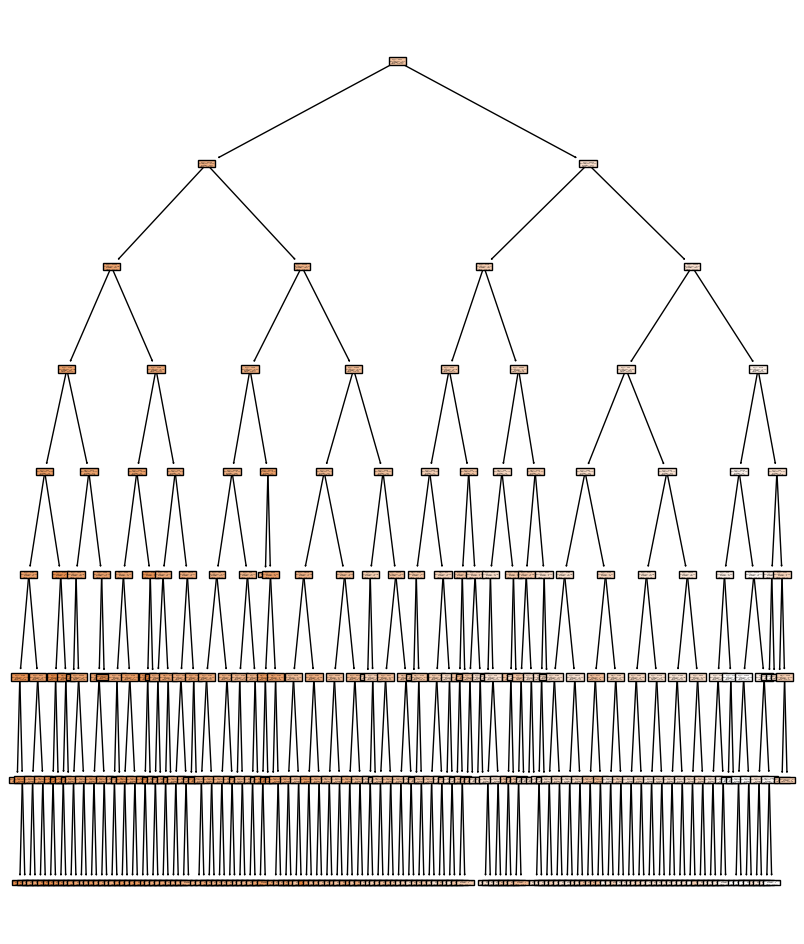

In [75]:
plt.figure(figsize=(10,12))
tree.plot_tree(reg2,filled=True)